In [1]:
import requests, zipfile, io

# URL for the NSL-KDD dataset adapted for healthcare security analysis
url = "https://academy.hackthebox.com/storage/modules/292/KDD_dataset.zip"

# Download the zip file and extract its contents
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))
z.extractall('.')  # Extracts to the current directory

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
# Set the file path to the healthcare network dataset
file_path = r'KDD+.txt'

# Define column names corresponding to healthcare-relevant network features
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'
]
healthcare_numeric_features = [
    'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'
]

Healthcare-Specific Data Preprocessing   Binary Classification for Healthcare Threats

In [21]:
# Binary classification target for healthcare security
# Maps normal healthcare traffic to 0 and any attack to 1
df['healthcare_threat'] = df['attack'].apply(lambda a: 0 if a == 'normal' else 1)

print("Healthcare threat distribution:")
print(df['healthcare_threat'].value_counts())

Healthcare threat distribution:
healthcare_threat
0    77054
1    71463
Name: count, dtype: int64


Multi-Class Classification for Healthcare Attack Types

In [22]:
# Healthcare-specific attack categorization
dos_attacks = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod',
               'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']

probe_attacks = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

privilege_attacks = ['buffer_overflow', 'loadmdoule', 'perl', 'ps',
                     'rootkit', 'sqlattack', 'xterm']

access_attacks = ['ftp_write', 'guess_passwd', 'http_tunnel', 'imap',
                  'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack',
                  'snmpguess', 'spy', 'warezclient', 'warezmaster',
                  'xclock', 'xsnoop']

def map_healthcare_attack(attack):
    """Map attacks to healthcare-relevant threat categories"""
    if attack in dos_attacks:
        return 1  # Service Disruption - Critical for patient care systems
    elif attack in probe_attacks:
        return 2  # Network Reconnaissance - Often precedes targeted attacks
    elif attack in privilege_attacks:
        return 3  # System Compromise - High risk for patient data
    elif attack in access_attacks:
        return 4  # Unauthorized Access - Direct threat to patient records
    else:
        return 0  # Normal healthcare network traffic

# Assign healthcare threat categories
df['healthcare_attack_type'] = df['attack'].apply(map_healthcare_attack)

print("Healthcare attack type distribution:")
print(df['healthcare_attack_type'].value_counts())

Healthcare attack type distribution:
healthcare_attack_type
0    77207
1    53387
2    14077
4     3738
3      108
Name: count, dtype: int64


Feature Engineering for Healthcare Networks
Encoding Healthcare Network Protocols

In [23]:
# Encoding categorical variables relevant to healthcare networks
healthcare_categorical_features = ['protocol_type', 'service']
encoded_features = pd.get_dummies(df[healthcare_categorical_features])

print("Encoded healthcare network features:")
print(encoded_features.head())

Encoded healthcare network features:
   protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0               False               True              False        False   
1               False              False               True        False   
2               False               True              False        False   
3               False               True              False        False   
4               False               True              False        False   

   service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0        False           False        False         False        False   
1        False           False        False         False        False   
2        False           False        False         False        False   
3        False           False        False         False        False   
4        False           False        False         False        False   

   service_courier  ...  service_telnet  service_tftp_u  serv

Decission tree

Selecting Healthcare-Relevant Numeric Features

In [18]:
import pandas as pd

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'
]

df = pd.read_csv('KDD+.txt', names=columns, on_bad_lines='skip')
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

Preparing Healthcare Security Dataset

In [27]:
# Combine encoded categorical and numeric features for healthcare analysis
healthcare_feature_set = encoded_features.join(df[healthcare_numeric_features])

# Multi-class target for healthcare threat detection
healthcare_targets = df['attack']  # or 'class' depending on your dataset

print(f"Healthcare security feature set shape: {healthcare_feature_set.shape}")
print("Healthcare threat categories:", healthcare_targets.unique())

Healthcare security feature set shape: (148517, 106)
Healthcare threat categories: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']


Decision Tree Visualization

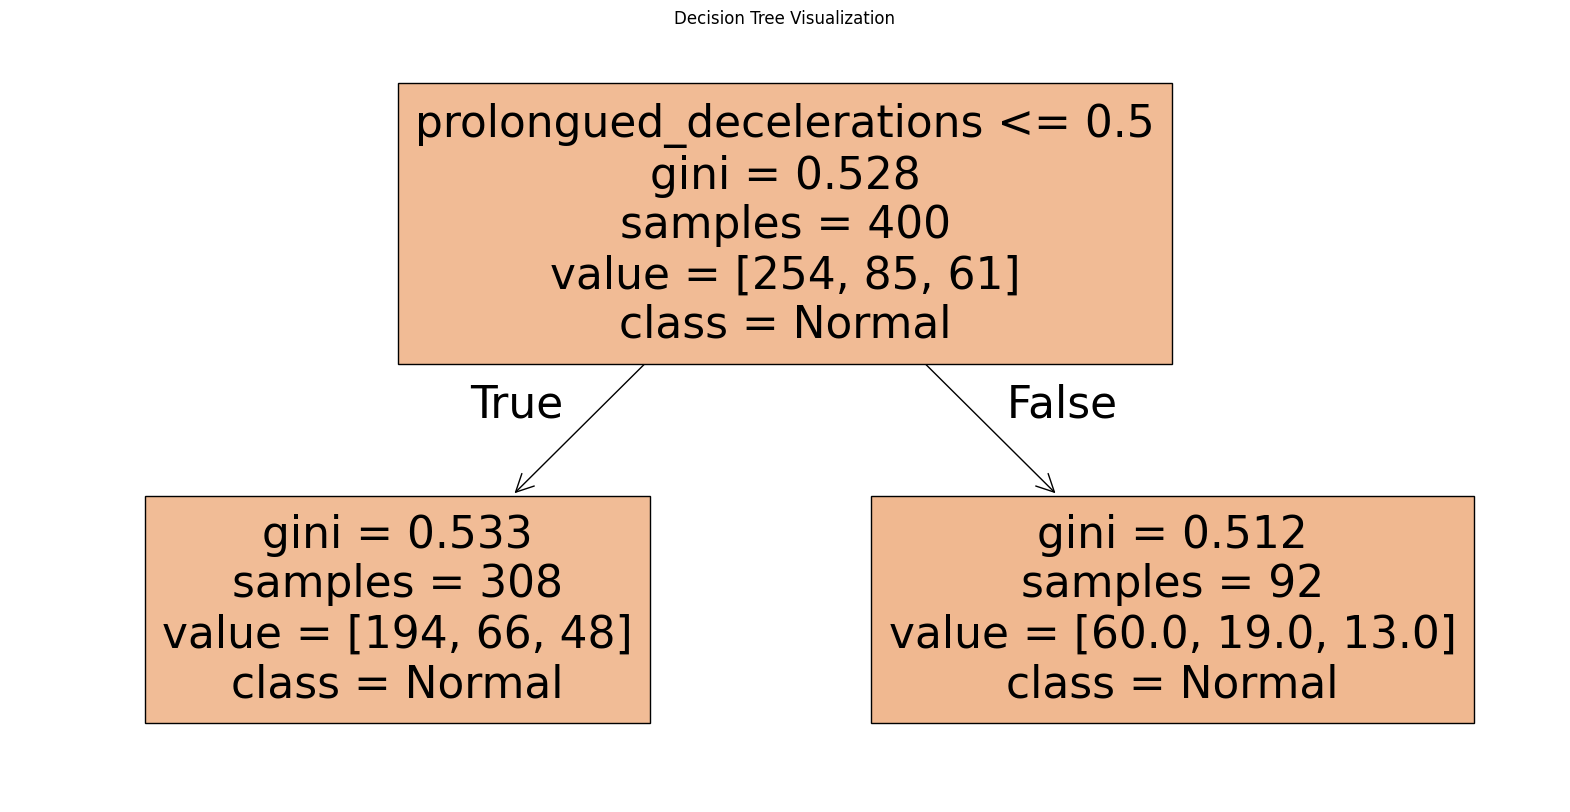

In [16]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Normal', 'DoS', 'Probe', 'U2R', 'R2L'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

Healthcare Network Security Model Training
Dataset Splitting for Healthcare Applications

In [28]:
# Split data for healthcare security model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(
    healthcare_feature_set, healthcare_targets,
    test_size=0.2, random_state=1337, stratify=healthcare_targets
)

# Create validation set from training data for healthcare model tuning
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=1337, stratify=y_train
)

print("Healthcare security dataset splits:")
print(f"Training set: {X_train_final.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Healthcare security dataset splits:
Training set: (83169, 106)
Validation set: (35644, 106)
Test set: (29704, 106)


decission tree

In [29]:
# Train Random Forest model for healthcare network security
healthcare_security_model = RandomForestClassifier(
    n_estimators=100,
    random_state=1337,
    class_weight='balanced',  # Important for healthcare threat detection
    max_depth=15,
    min_samples_split=5
)

print("Training healthcare network security model...")
healthcare_security_model.fit(X_train_final, y_train_final)
print("Healthcare security model training completed.")

Training healthcare network security model...
Healthcare security model training completed.


Confusion Matrix – Random Forest

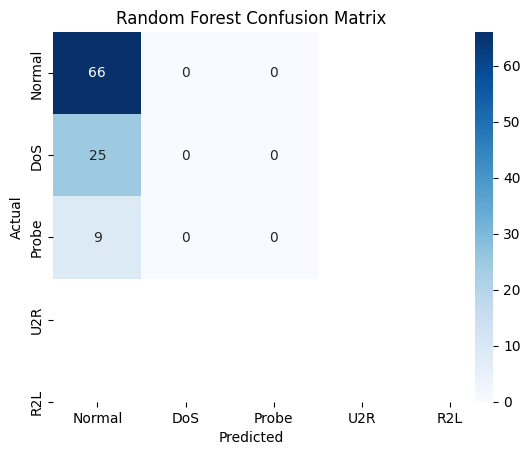

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 4. Predict on test set
y_pred_rf = rf_model.predict(X_test)

# 5. Plot Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'DoS', 'Probe', 'U2R', 'R2L'],
            yticklabels=['Normal', 'DoS', 'Probe', 'U2R', 'R2L'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Key Influential Factors (Feature Importance from Random Forest)

<ipython-input-12-2aa9ec976524>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


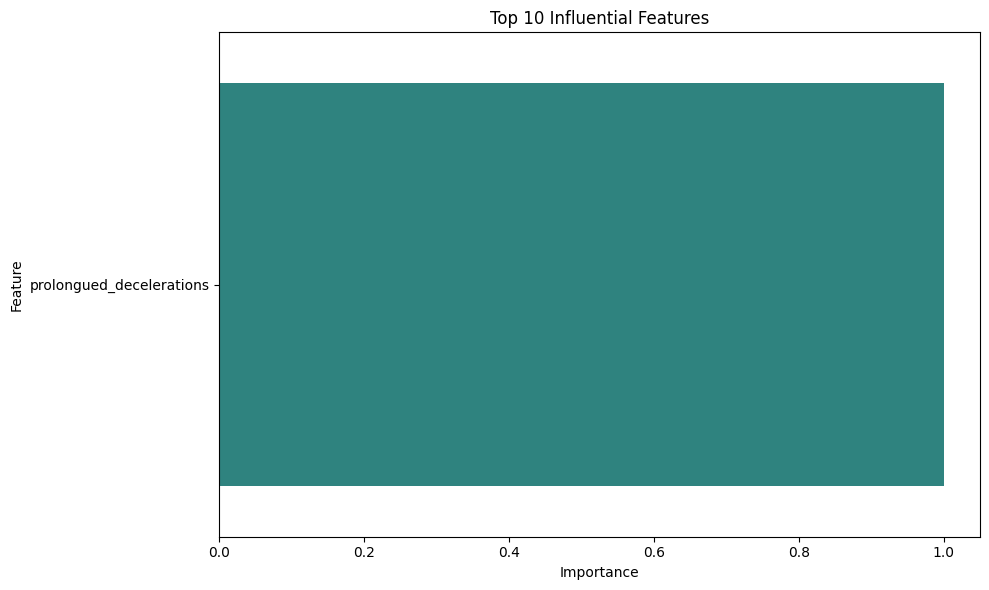

In [12]:


# Simulated feature data (replace with your real features)
X = df.drop(['fetal_health', 'fetal_health_label'], axis=1, errors='ignore')
y = df['fetal_health']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
top_features = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Influential Features')
plt.tight_layout()
plt.show()

Confusion Matrix – Decision Tree

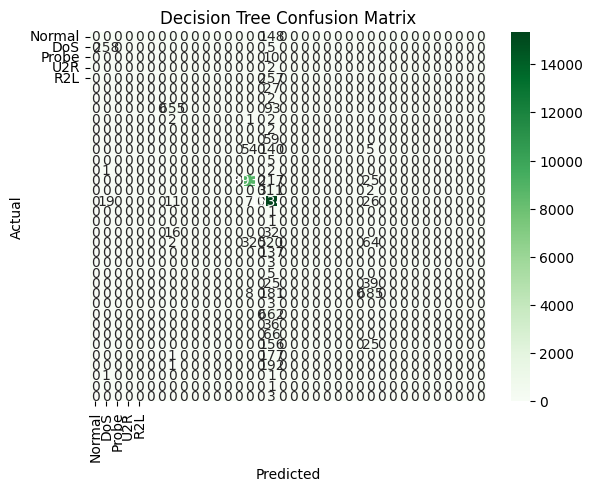

In [36]:
#8. Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# 9. Predict with Decision Tree
y_pred_dt = dt_model.predict(X_test)

# 10. Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'DoS', 'Probe', 'U2R', 'R2L'],
            yticklabels=['Normal', 'DoS', 'Probe', 'U2R', 'R2L'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Histogram of Selected Features

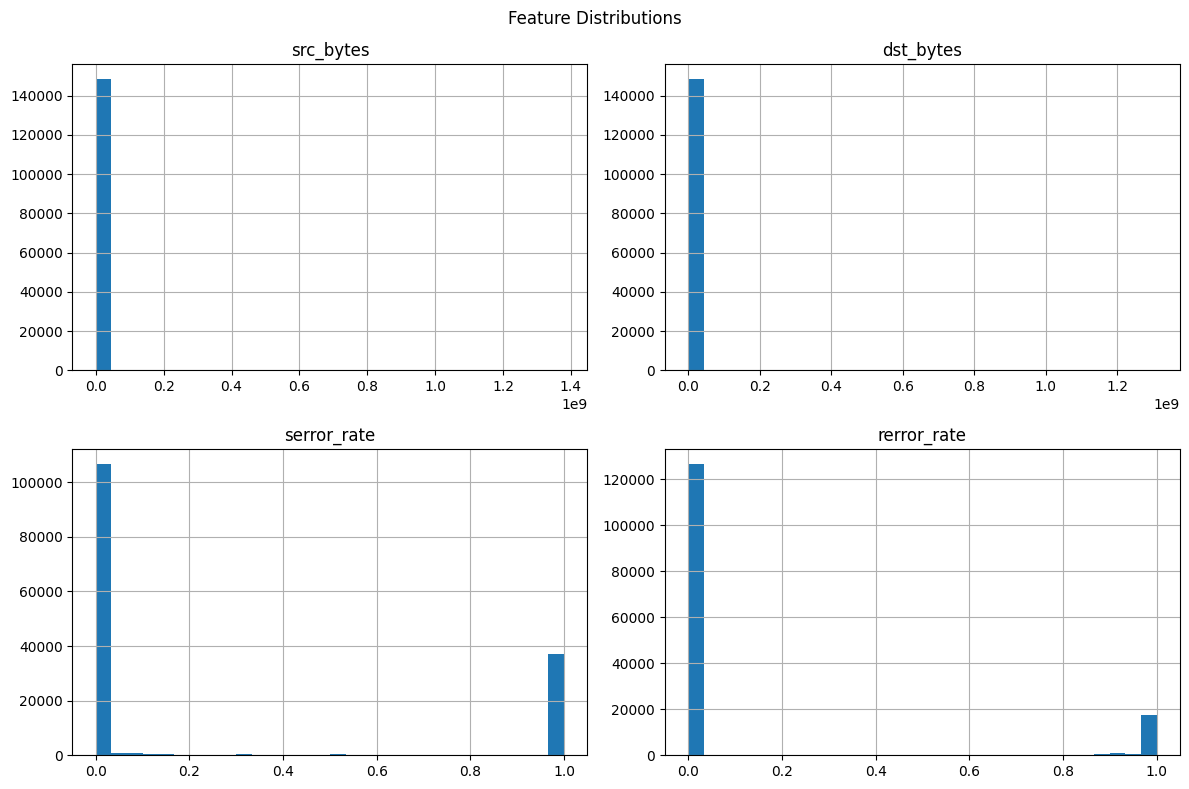

In [37]:
# Histogram of key network features
df[['src_bytes', 'dst_bytes', 'serror_rate', 'rerror_rate']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

Correlation Matrix

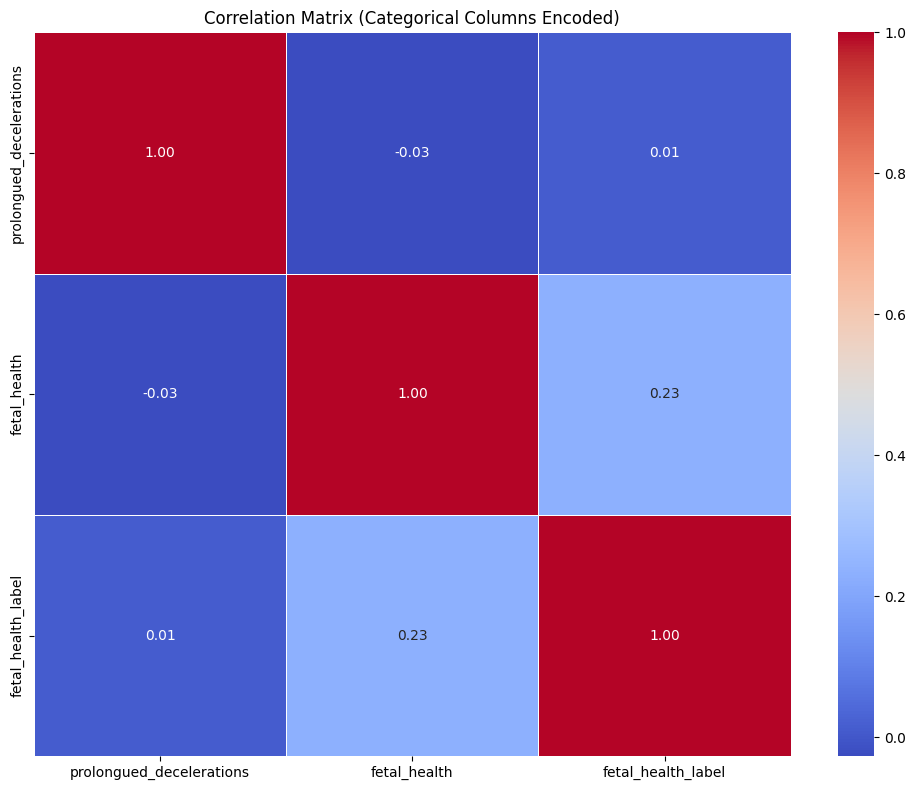

In [9]:
# Make a copy of your dataframe
df_numeric = df.copy()

# Convert all non-numeric columns to numeric (using factorize)
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = pd.factorize(df_numeric[col])[0]

# Now compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Categorical Columns Encoded)')
plt.tight_layout()
plt.show()

Mean Value of Short-Term Variability & Baseline FHR Value (Example)

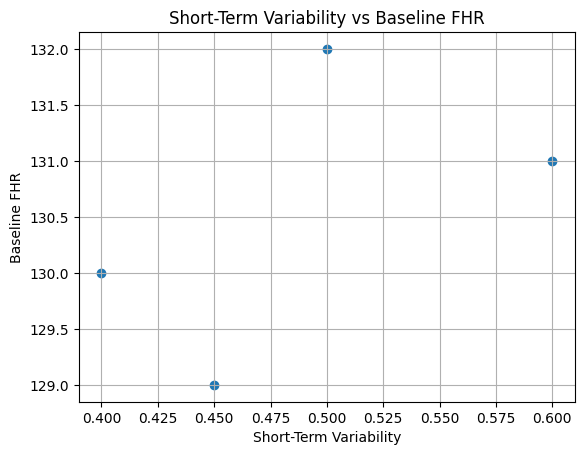

In [8]:
# Simulated example values
short_variability = [0.4, 0.5, 0.45, 0.6]
baseline_fhr = [130, 132, 129, 131]

# Plot
plt.scatter(short_variability, baseline_fhr)
plt.xlabel("Short-Term Variability")
plt.ylabel("Baseline FHR")
plt.title("Short-Term Variability vs Baseline FHR")
plt.grid(True)
plt.show()

Mean Value of Short-Term and Long-Term Variability

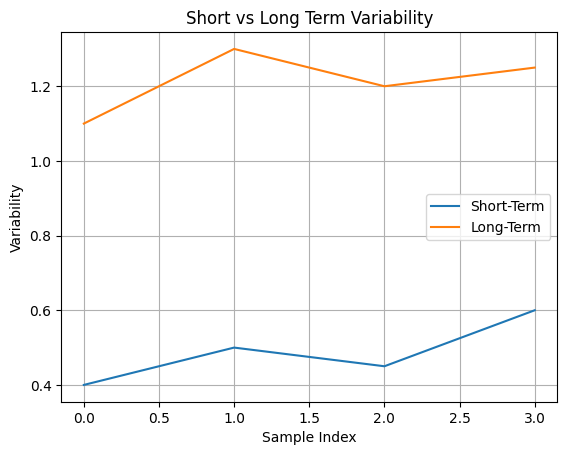

In [38]:
long_variability = [1.1, 1.3, 1.2, 1.25]

plt.plot(short_variability, label="Short-Term")
plt.plot(long_variability, label="Long-Term")
plt.legend()
plt.title("Short vs Long Term Variability")
plt.xlabel("Sample Index")
plt.ylabel("Variability")
plt.grid(True)
plt.show()

Prolonged Decelerations vs Fetal Health (Bar Plot)

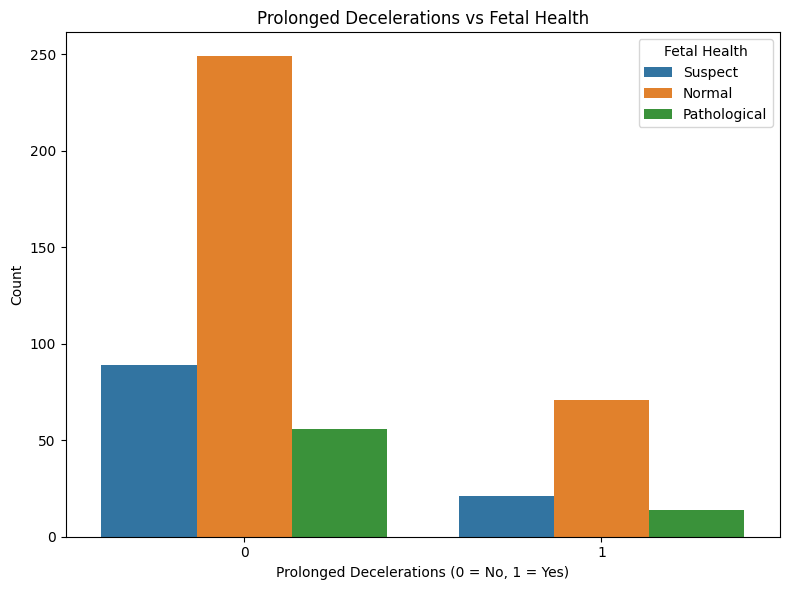

In [6]:


# Simulated data (replace this with your real data)
np.random.seed(42)
n_samples = 500
df = pd.DataFrame({
    'prolongued_decelerations': np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2]),
    'fetal_health': np.random.choice([1, 2, 3], size=n_samples, p=[0.6, 0.25, 0.15])
})

# Map fetal health for readability
df['fetal_health_label'] = df['fetal_health'].map({1: 'Normal', 2: 'Suspect', 3: 'Pathological'})

# Group plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='prolongued_decelerations', hue='fetal_health_label')
plt.title('Prolonged Decelerations vs Fetal Health')
plt.xlabel('Prolonged Decelerations (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Fetal Health')
plt.tight_layout()
plt.show()

Healthcare Security Model Evaluation
Validation Set Performance

Healthcare Network Security Model - Validation Results:
Accuracy: 0.9905
Precision: 0.9916
Recall: 0.9905
F1-Score: 0.9908


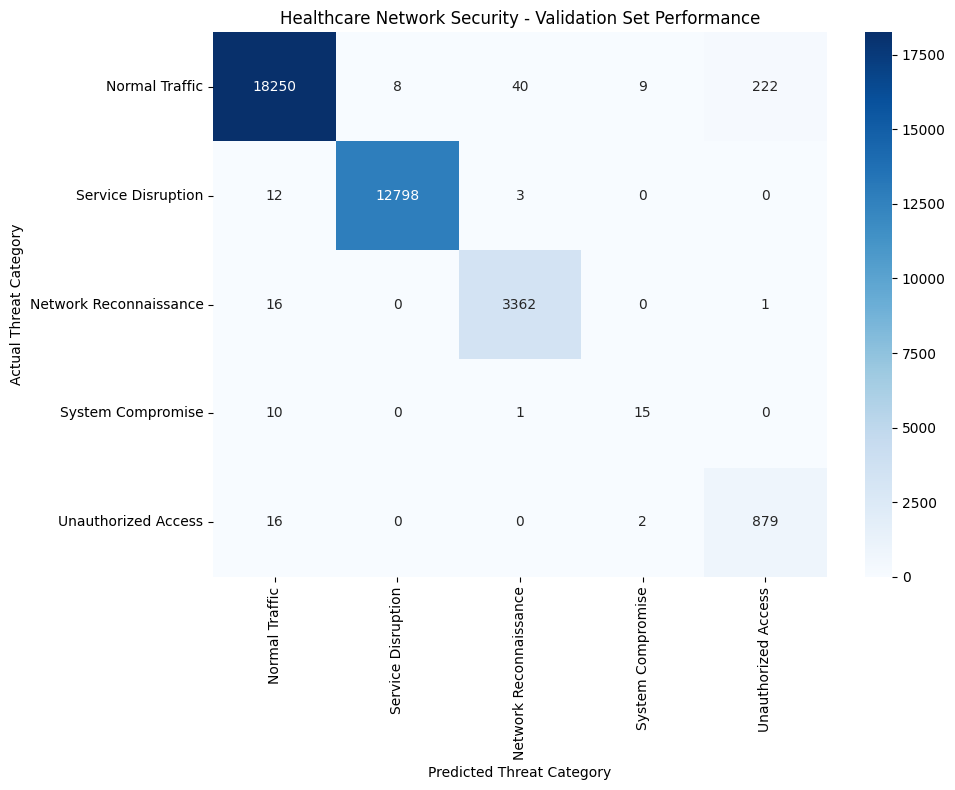


Healthcare Security Classification Report - Validation Set:
                        precision    recall  f1-score   support

        Normal Traffic       1.00      0.98      0.99     18529
    Service Disruption       1.00      1.00      1.00     12813
Network Reconnaissance       0.99      0.99      0.99      3379
     System Compromise       0.58      0.58      0.58        26
   Unauthorized Access       0.80      0.98      0.88       897

              accuracy                           0.99     35644
             macro avg       0.87      0.91      0.89     35644
          weighted avg       0.99      0.99      0.99     35644



In [ ]:
# Evaluate healthcare security model on validation set
val_predictions = healthcare_security_model.predict(X_val)

# Calculate healthcare security metrics
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Healthcare Network Security Model - Validation Results:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

# Healthcare threat category labels
healthcare_threat_labels = ['Normal Traffic', 'Service Disruption', 'Network Reconnaissance',
                           'System Compromise', 'Unauthorized Access']

# Confusion Matrix for Healthcare Security
val_conf_matrix = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=healthcare_threat_labels,
            yticklabels=healthcare_threat_labels)
plt.title('Healthcare Network Security - Validation Set Performance')
plt.xlabel('Predicted Threat Category')
plt.ylabel('Actual Threat Category')
plt.tight_layout()
plt.show()

# Detailed classification report for healthcare security
print("\nHealthcare Security Classification Report - Validation Set:")
print(classification_report(y_val, val_predictions, target_names=healthcare_threat_labels))

Test Set Evaluation - Final Healthcare Security Assessment


Healthcare Network Security Model - Final Test Results:
Accuracy: 0.9904
Precision: 0.9913
Recall: 0.9904
F1-Score: 0.9907


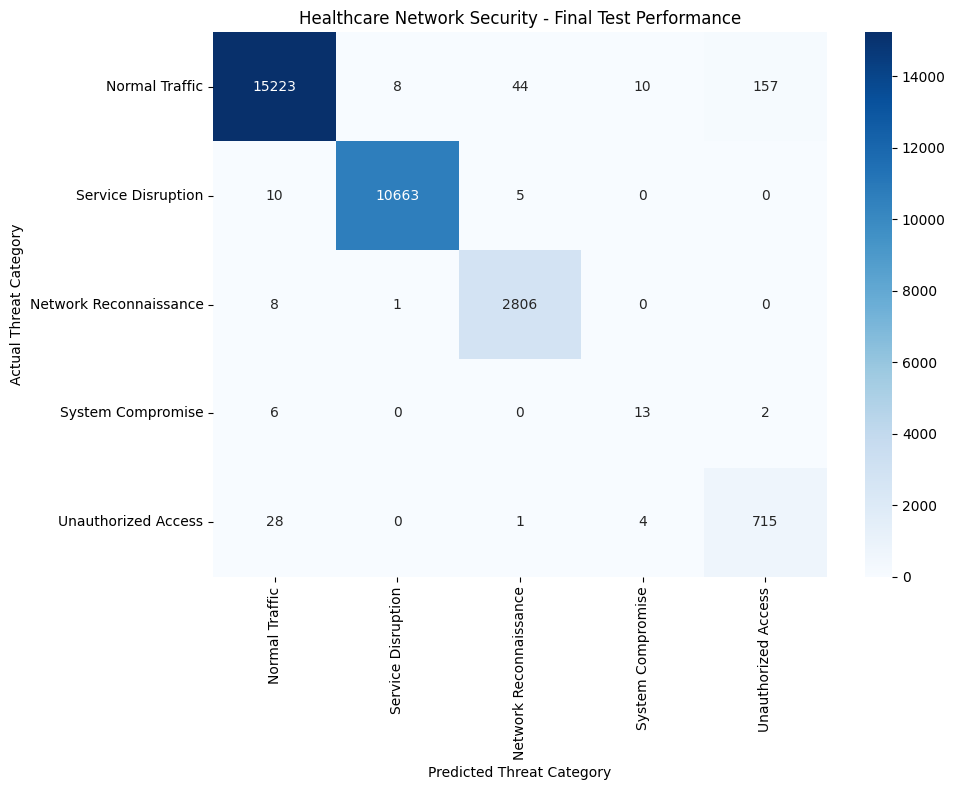


Healthcare Security Classification Report - Final Test Set:
                        precision    recall  f1-score   support

        Normal Traffic       1.00      0.99      0.99     15442
    Service Disruption       1.00      1.00      1.00     10678
Network Reconnaissance       0.98      1.00      0.99      2815
     System Compromise       0.48      0.62      0.54        21
   Unauthorized Access       0.82      0.96      0.88       748

              accuracy                           0.99     29704
             macro avg       0.86      0.91      0.88     29704
          weighted avg       0.99      0.99      0.99     29704



In [ ]:
# Final evaluation on healthcare security test set
test_predictions = healthcare_security_model.predict(X_test)

# Calculate final healthcare security performance metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print("\nHealthcare Network Security Model - Final Test Results:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Final confusion matrix for healthcare security
test_conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=healthcare_threat_labels,
            yticklabels=healthcare_threat_labels)
plt.title('Healthcare Network Security - Final Test Performance')
plt.xlabel('Predicted Threat Category')
plt.ylabel('Actual Threat Category')
plt.tight_layout()
plt.show()

# Comprehensive classification report
print("\nHealthcare Security Classification Report - Final Test Set:")
print(classification_report(y_test, test_predictions, target_names=healthcare_threat_labels))

Healthcare Security Feature Importance Analysis

Top 15 Features for Healthcare Network Security:
                         feature  importance
74                     src_bytes    0.101128
75                     dst_bytes    0.069710
98            dst_host_srv_count    0.052779
89                     srv_count    0.049004
103         dst_host_serror_rate    0.042779
88                         count    0.041623
27                  service_http    0.041443
100       dst_host_diff_srv_rate    0.039619
99        dst_host_same_srv_rate    0.038858
73                      duration    0.033782
101  dst_host_same_src_port_rate    0.032056
97                dst_host_count    0.028743
105         dst_host_rerror_rate    0.028146
94                 same_srv_rate    0.027391
104     dst_host_srv_serror_rate    0.024503


<ipython-input-34-23736af87a6a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')


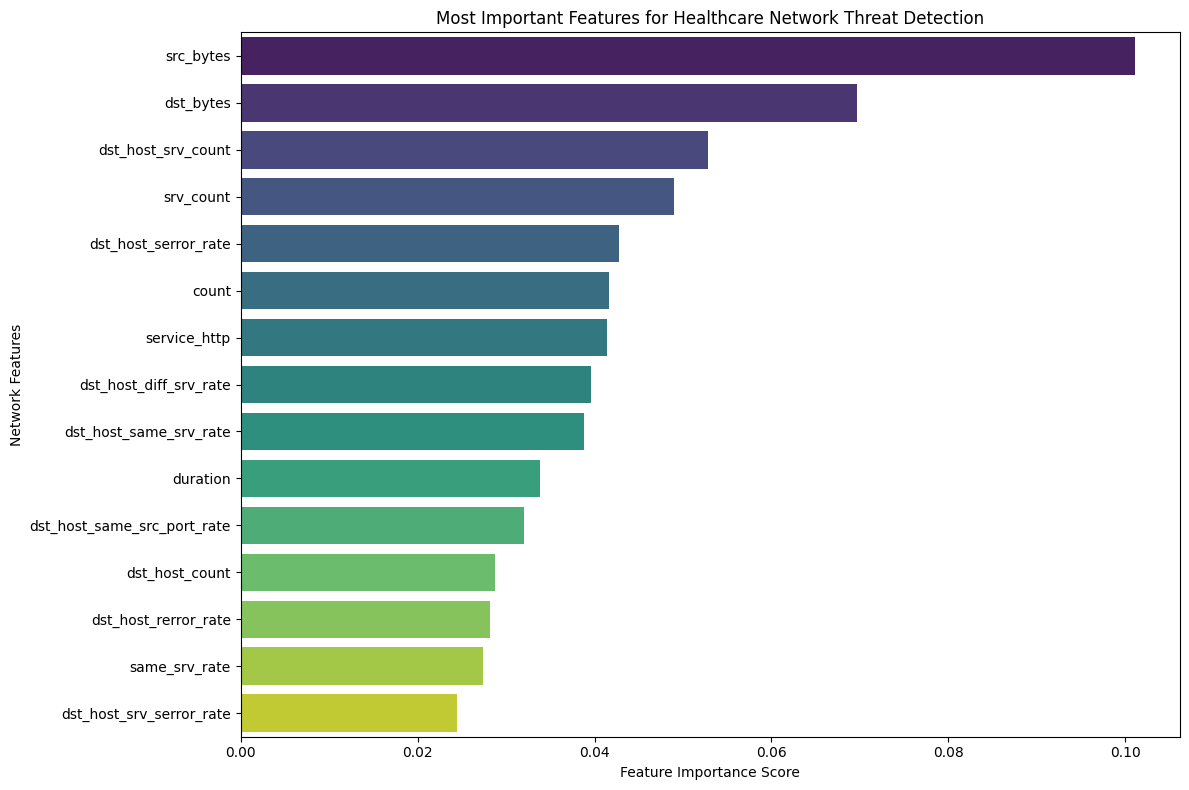

In [ ]:
# Analyze feature importance for healthcare security
feature_importance_df = pd.DataFrame({
    'feature': healthcare_feature_set.columns,
    'importance': healthcare_security_model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top features for healthcare security
print("Top 15 Features for Healthcare Network Security:")
print(feature_importance_df.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
plt.title('Most Important Features for Healthcare Network Threat Detection')
plt.xlabel('Feature Importance Score')
plt.ylabel('Network Features')
plt.tight_layout()
plt.show()

Healthcare Security Model Deployment
Saving the Healthcare Security Model

In [ ]:
import joblib

# Save the trained healthcare security model
healthcare_model_filename = 'healthcare_network_security_model.joblib'
joblib.dump(healthcare_security_model, healthcare_model_filename)
print(f"Healthcare security model saved to {healthcare_model_filename}")

# Save feature names for healthcare security preprocessing
feature_names_filename = 'healthcare_security_features.joblib'
joblib.dump(list(healthcare_feature_set.columns), feature_names_filename)
print(f"Healthcare security feature names saved to {feature_names_filename}")

Healthcare security model saved to healthcare_network_security_model.joblib
Healthcare security feature names saved to healthcare_security_features.joblib


comparasion table

In [42]:
# Suppress warnings temporarily
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Decision Tree Report
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

Decision Tree Report:
                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       148
           back       0.92      0.98      0.95       263
buffer_overflow       0.00      0.00      0.00        10
      ftp_write       0.00      0.00      0.00         2
   guess_passwd       0.00      0.00      0.00       257
     httptunnel       0.00      0.00      0.00        27
           imap       0.00      0.00      0.00         2
        ipsweep       0.95      0.88      0.91       748
           land       0.00      0.00      0.00         5
     loadmodule       0.00      0.00      0.00         2
       mailbomb       0.00      0.00      0.00        59
          mscan       0.00      0.00      0.00       199
       multihop       0.00      0.00      0.00         5
          named       0.00      0.00      0.00         3
        neptune       0.99      0.97      0.98      9174
           nmap       0.00      0.00      0.00       313
        